# 선형모델
## linear regression

In [7]:
from IPython.display import display
import sklearn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings

warnings.simplefilter("ignore") # warning 무시하기
%matplotlib inline

In [8]:
# ŷ =w[0]×x[0]+w[0]×x[0]+⋯+w[p]×x[p]+b

In [9]:
# w = weight, b = bias

In [10]:
## 특성이 하나라면//!
# ŷ =w[0]×x[0]+b

w[0]: 0.393906  b: -0.031804


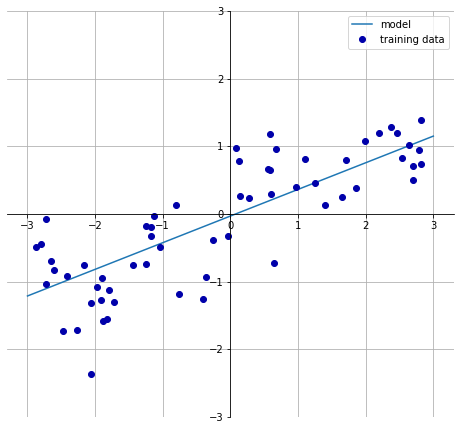

In [11]:
mglearn.plots.plot_linear_regression_wave()

# 선형 회귀(최소제곱법)
## Linear Regression
## OLS, orinary least squares
##### 평균제곱오차 - MSE를 최소화하는 weight 와 bias를 찾는 기법

##### MSE=1/n ∑ (yi − ŷi)^2

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [18]:
print("coef_ 는 각 특성에 적용되는 weight값")
print("lr.coef_: {}".format(lr.coef_))
print("intercept_ 는 편차")
print("lr.intercept_: {}".format(lr.intercept_))

coef_ 는 각 특성에 적용되는 weight값
lr.coef_: [0.39390555]
intercept_ 는 편차
lr.intercept_: -0.031804343026759746


In [17]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [19]:
##
#보스턴 주택가격 데이터셋

In [21]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [22]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [23]:
# -> 과대적합을 확인할 수 있습니다.

# 릿지 회귀(능형 회귀)
## Ridge - 선형회귀 모델중 하나..!

#### 특징 - 가중치의 절대값을 최소화 하도록 training 한다

In [24]:
#-> 이런 제약들 규제 (Regularization)이라 합니다..!

In [25]:
## 릿지에서는 L2 규제를 사용합니다. (수학적으로 릿지는 계수의 L2 norm의 제곱을 패널티로 적용합니다.)

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [30]:
## 훈련 세트에서는 LinearRegression보다 점수가 낮지만, 
## 테스트 세트에 대한 점수는 더 높습니다. 
## 덜 자유로운 모델인만큼 과대적합이 적어집니다. 
## 모델의 복잡도가 낮아지면 훈련 세트에 대한 성능은 나빠지지만 더 일반화된 모델이 됩니다.

In [40]:

# alpha => 규제의 정도

# 규제가 쌔질수록 가중치를 낮춰 일반화하게 만들어준다..!

# alpha가 0에 가까워 질수록 weight들이 linear regression과 비슷해진다!

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))
print(ridge10.coef_)

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64
[-8.11609631e-01  6.47608896e-01 -8.09783229e-01  3.11334709e-01
 -6.84623747e-01  4.38797575e+00 -1.47554474e-01 -2.44214065e+00
  8.45915099e-01 -1.14727508e+00 -2.33162040e+00  1.06787015e+00
 -3.98391025e+00 -5.98636976e-01  2.93228193e-03 -5.21253823e-01
  1.40339673e-01 -6.45256057e-01 -7.61400539e-01 -7.47231171e-01
 -3.86298005e-02 -8.29808059e-01 -7.52859756e-01 -6.75605899e-01
 -8.72001488e-01 -3.23330640e-01  1.27336327e+00 -3.37279550e-01
  6.30682038e-02  2.37092897e-01  2.09805607e+00  1.00996768e-01
 -2.79529662e-01  1.73222619e-01 -3.33557850e-01 -3.74226653e-01
  6.98414808e-01 -6.96284918e-01  7.79521010e-01  3.74843210e-01
 -6.24101244e-01 -7.63657605e-01  4.35756439e-02 -1.04000852e+00
  4.24401576e-01  4.78687021e-01 -3.84125445e-01 -9.93802653e-02
 -1.30226356e+00  3.11334709e-01 -5.92097637e-01  6.33816542e-01
  6.66792895e-01 -1.27959944e-01  1.35346930e+00  1.09839246e+00
  6.37100148e-01  4.76402917e-01 -9.70121915e-01 -1.4381928

In [41]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))
print(ridge01.coef_)

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77
[-2.33300720e+00 -5.44192850e+00 -6.12865463e+00 -7.78524693e-01
  1.29152995e+00  1.90222839e+01  4.35864731e+00 -1.11911067e+01
  9.55539672e+00 -7.48671406e-01 -5.33307088e-01  6.23384946e+00
 -2.72886731e+00  5.86117121e+00  2.28233711e-02 -9.01608311e-01
  4.66756441e+00 -3.37983354e+00  1.31611460e+00 -3.48895554e+00
  4.41536215e-01 -3.51941085e+00 -2.52222659e+00 -2.69562070e+00
  2.44649480e-01 -1.02306604e+00  3.04223584e+00 -2.68804128e+00
  4.28396019e+00 -2.94109311e+00  8.70934702e+00 -3.13683472e+00
 -2.91608183e-01  2.17487375e+00  3.62658111e+00  2.30047840e+00
 -2.83789461e+00 -6.17207969e+00  7.94858912e+00  1.65631996e+00
  8.72779643e+00  1.08042552e+00  5.72208008e+00 -4.76401068e+00
  5.07461001e+00  8.01603635e+00 -8.44254041e+00 -6.44526450e-01
 -1.42288399e+01 -7.78524693e-01 -1.38982595e+01 -1.59298479e+01
  6.42600904e+00 -1.85273659e+00  6.37949850e+00  4.03122648e+00
 -9.48053011e-01  1.11134392e+01 -6.97597662e+00 -6.7160860

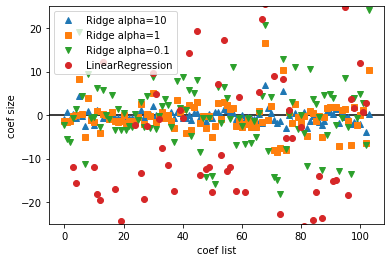

In [42]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("coef list")
plt.ylabel("coef size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

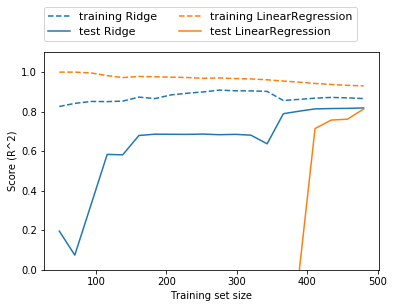

In [43]:
#학습곡선 확인..!
mglearn.plots.plot_ridge_n_samples()

In [37]:
# 데이터가 많아짐에 따라 규제 항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아진다는 점을 알 수 있습니다. 
# 여기서 흥미로운 점은 선형 회귀의 훈련 데이터 성능이 감소한다는 것입니다. 이는 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문입니다.


# 랏쏘 회귀(Lasso 회귀)
## Ridge와 비슷하게 계수를 0에 가깝게 만들어 복잡성을 줄이도록 노력한다

### 하지만!!!!!!! 규제함수가 다르다 랏소는 L1 규제를 사용한다!
### 릿지와마찬가지로 alpha의 크기가 커지면 페널티의 효과가 커지고, 작아지면 효과가 작아집니다.


In [59]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [60]:
# 엄청난 과소적합을 확인할수 있다// -> 알파값을 조금 내려서 규제를 좀 풀어주자!

In [61]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [62]:
# 총 104개의 특성중 33개만 사용해서 간단한 모델을 만들었다!

In [63]:
# alpha를 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해집니다.

In [64]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


# 선형모델을 이용한 분류!!
## Binary classificarion

In [66]:
# 방정식만 추가되었습니다!
#ŷ =w[0]×x[0]+w[1]×x[1]+⋯+w[p]×x[p]+b>0

In [71]:
# 1. Logistic regression - > 이름만 회귀지 이건 분류모델입니다 ㅋㅋ!
# 2. support vector machine

# 둘다 L2 규제를 기본으로 사용하고 있어요!

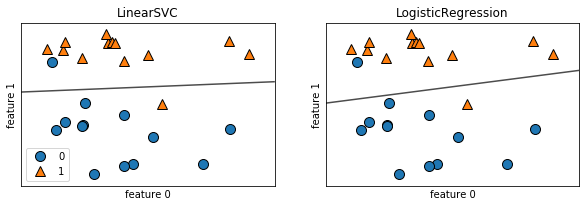

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

In [72]:
# 이 모델들에서 규제의 강도를 결정하는 매개변수는 C입니다. 
# C값이 높아지면 규제가 감소합니다. 
# 값이 작아지면 데이터 포인트 중 다수에 맞추려고 하며, 커지면 개개의 데이터 포인트를 정확히 분류하려고 합니다.

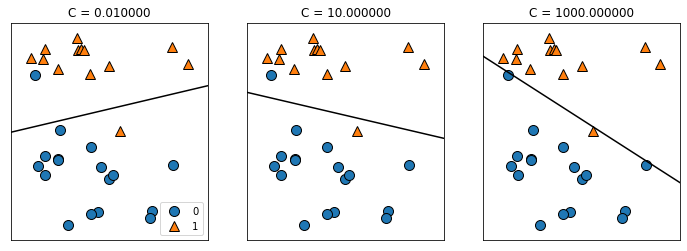

In [73]:
mglearn.plots.plot_linear_svc_regularization()

In [74]:
# 결과를 확인해보면 C의 값이 큰 오른쪽 그래프에서는 훈련 데이터에 대해서 잘 분류하고 있지만, 전체적 배치 특성에 비해 과한 분류 직선을 가지고 있습니다. 
# 과대적합임을 추측할 수 있습니다.

In [77]:
# 유방암 데이터 + logistic regression 분류모델
# C 의 default 값은 1

In [76]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression( ).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


In [78]:
# 하지만 훈련 세트와 테스트 세트의 성능이 비슷하므로 과소적합인 것 같습니다

In [79]:
# 모델의 제약을 더 풀어주기 위해 C를 100으로 증가시켜봅시다.

In [80]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.967
테스트 세트 점수: 0.965


In [81]:
# 과소적합이 어느정도 해소됨과 동시에 정확도도 올라간 것을 확인할 수 있습니다.

In [83]:
# 규제를 좀 더 줘보자!! C = 0.01

In [84]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


In [85]:
# 93% 정확도도 낮은 것은 아니지만 정확도가 떨어지는 것을 확인할 수 있습니다. 
# 이제 규제 매개변수 C 설정을 세 가지로 다르게 하여 학습시킨 모델의 계수를 그래프로 확인해봅시다.

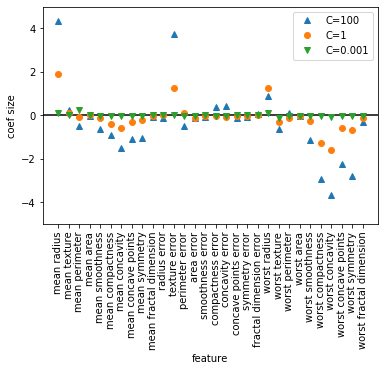

In [86]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("coef size")
plt.legend()

In [87]:
# C 0.001 = 규제가 심하다
# C 1 = 그럭저럭 default
# C 100 = 규제를 풀어줌

In [89]:
# 규제 l1 은 아예 변수 가중치를 0으로 보내고 l2는 작게 만들어요

In [90]:
# 대부분 비슷한 부호의 가중치에 크기만 변화하지만 일부 음양이 달라지는 계수가 존재합니다. 
# 그런 특성의 경우에는 양성, 음성에 미치는 영향을 판단하기 어렵다는 것을 알 수 있습니다.

In [92]:
#  더 이해하기 쉬운 모델을 원한다면 L1 규제를 사용하면 됩니다. 
#  일부 특성이 사라지겠지만 분석하기 좀 더 쉬워집니다. 다음은 그 결과입니다.

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


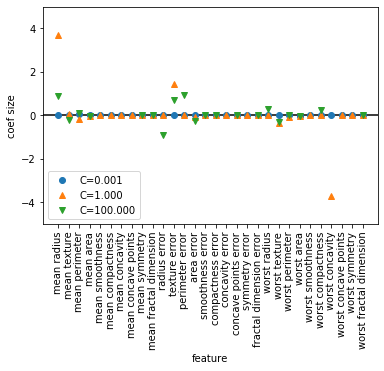

In [93]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("feature")
plt.ylabel("coef size")

plt.ylim(-5, 5)
plt.legend(loc=3)

# 다중클래스 분류모델 (로지스틱 회귀 분류)
## 로지스틱 회귀만 다중분류를 해주고
### 다른 선형 분류모델은 이진분류만 지원해요..!
#### 로지스틱 회귀의 경우에는 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원합니다

# 다중분류를 하기위해 로지스틱회귀를 N개 사용해봐요!
### N개의 분류기를 사용해봅시다!

In [96]:
# not logistic regression clf
# -> N개의 분류기를 사용해서 1:N 방식으로
# 가장 높은 점수를 내는 분류기 클래스를 예측값으로 사용..!
# 각 클레스가 계수와 벡터, 절편을 가진다..

# -> 
# y = w[0]×x[0]+w[1]×x[1]+⋯+w[p]×x[p]+b

In [97]:
# 하지만 로지스틱은 다르다..!

In [98]:
# Pr(Yi=c)=ewc⋅Xi∑Kk=1ewk⋅Xi

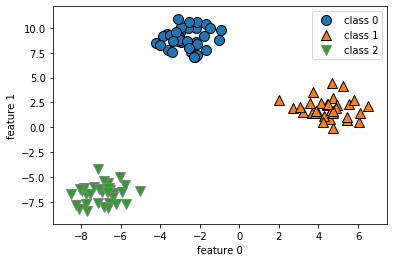

In [99]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2"])

In [101]:
# SVC 3개 써서 분류하는 모습을 봅시다!

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


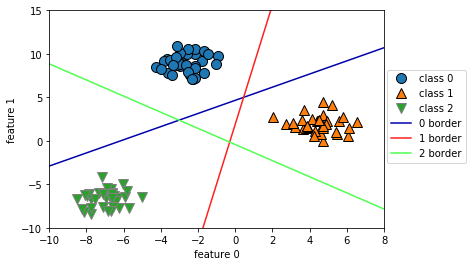

In [102]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

# 계수 배열의 크기:  (3, 2)
# 절편 배열의 크기:  (3,)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', '0 border', '1 border',
            '2 border'], loc=(1.01, 0.3))

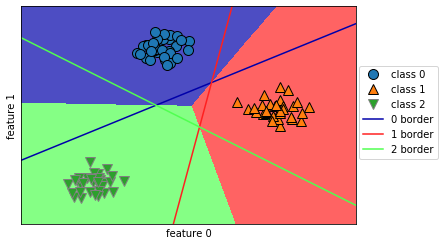

In [103]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', '0 border', '1 border',
            '2 border'], loc=(1.01, 0.3))

In [104]:
#가운데 삼각형은 제각기 나눠가진걸 볼수 있어요~

In [105]:
# 그리고 L1 또는 L2 규제를 사용할지 정해야 합니다. 
# 특성을 많이 사용하면 L2, 주요 특성을 줄이기 위해서는 L1을 사용합니다. 
# L1을 사용하면 모델을 분석하기 용이해지고 중요한 특성이 무엇이며, 그 영향을 파악하기 쉽습니다.